<a href="https://colab.research.google.com/github/sheldonkemper/bank_of_england/blob/main/notebooks/modelling/am_topic_clustering_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**

The notebook is designed to process, clean, and visualize classified high-level topic discussions from financial Q&A sessions of two banks, JPMorgan (JPM) and UBS. It integrates structured financial data and applies data transformations and visualizations to analyze topic trends over time. The goal is to extract insights from analyst questions and executive answers, focusing on risk exposure, macro topics, and high-level topics.

**Approach:**
Data Loading & Preprocessing:

Reads CSV files containing questions and answers for both JPMorgan and UBS.
Renames columns and standardizes them across datasets.
Combines data into a single structured DataFrame, distinguishing between:
Question vs. Answer
Associated Bank (JPM or UBS)
Cleans text fields by removing special characters.
Exploratory Data Analysis (EDA):

Counts occurrences of topics and visualizes their frequency using bar charts.
Identifies top 10 topics per quarter and plots them over time.
Analyzes key topics associated with different risk levels.
Visualization of Trends & Insights:

Plots topic distribution per bank and quarter.
Identifies top analysts engaging in discussions and their frequently discussed topics.
Highlights macro-level trends per quarter.
Compares high-level topics across banks.
Insights Extraction:

Finds the most discussed macro and high-level topics per quarter for each bank.
Compares topic distribution across risk categories.

# Section 1: Data Loading & Preprocessing

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
import os
import sys
from google.colab import drive
# Mount Google Drive to the root location
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# JPMorgan Question
file_path = "/content/drive/MyDrive/BOE/bank_of_england/data/model_outputs/Topic_Modelling_am/Final topic model/tqc_JPM_classified_highlevel_topics_questions.csv"

# Read the CSV file
df_jpm_q = pd.read_csv(file_path)

In [4]:
# JPMorgan Answer
file_path = "/content/drive/MyDrive/BOE/bank_of_england/data/model_outputs/Topic_Modelling_am/Final topic model/tqc_JPM_classified_highlevel_topics_answeres.csv"

# Read the CSV file
df_jpm_a = pd.read_csv(file_path)

In [5]:
# UBS Question
file_path = "/content/drive/MyDrive/BOE/bank_of_england/data/model_outputs/Topic_Modelling_am/Final topic model/tqc_ubs_classified_highlevel_topics_questions.csv"

# Read the CSV file
df_ubs_q = pd.read_csv(file_path)

In [6]:
# UBS Answer
file_path = "/content/drive/MyDrive/BOE/bank_of_england/data/model_outputs/Topic_Modelling_am/Final topic model/tqc_UBS_classified_highlevel_topics_answeres.csv"

# Read the CSV file
df_ubs_a = pd.read_csv(file_path)

In [7]:
# Rename column in df_jpm_q
df_jpm_q = df_jpm_q.rename(columns={"Analyst": "Analyst_Bank"})

# Rename column in df_jpm_a
df_jpm_a = df_jpm_a.rename(columns={"Analyst": "Analyst_Bank"})

In [8]:
# List of input dataframes with their respective names
dataframes = {
    "df_jpm_q": df_jpm_q,
    "df_jpm_a": df_jpm_a,
    "df_ubs_q": df_ubs_q,
    "df_ubs_a": df_ubs_a
}

# Columns to copy
columns_to_copy = ["Quarter", "Analyst_Bank", "Executive", "Topic",
                   "snippet_sent", "Risk", "Macro Topic", "High Level Topic"]

# Initialize an empty list to store processed dataframes
processed_dfs = []

# Loop through each dataframe
for name, df in dataframes.items():
    # Copy selected columns
    new_df = df[columns_to_copy].copy()

    # Add Question/Answer column
    new_df["Question/Answer"] = "Question" if "_q" in name else "Answer"

    # Add Bank column
    new_df["Bank"] = "JPM" if "_jpm_" in name else "UBS"

    # Append to list
    processed_dfs.append(new_df)

# Concatenate all processed dataframes
final_df = pd.concat(processed_dfs, ignore_index=True)

In [9]:
final_df

,Quarter,Analyst_Bank,Executive,Topic,snippet_sent,Risk,Macro Topic,High Level Topic,Question/Answer,Bank
0,4Q24,John McDonald,Jeremy Barnum,Growth of Capital Base,Neutral,Medium,Total exposure,Equity,Question,JPM
1,4Q24,John McDonald,Jeremy Barnum,Decision on Capital Deployment,Neutral,Medium,Total exposure,Equity,Question,JPM
2,4Q24,John McDonald,Jeremy Barnum,Investment Strategy Comparison,Neutral,Medium,Values of underwritten transactions in debt an...,Equity,Question,JPM
3,4Q24,John McDonald,Jeremy Barnum,Return on Investment,Neutral,High,Multi-Topic,Profit,Question,JPM
4,4Q24,Mike Mayo,Jamie Dimon,CEO Succession,Neutral,Low,Multi-Topic,Loss,Question,JPM
...,...,...,...,...,...,...,...,...,...,...
1654,4Q24,HSBC,"['Todd Tuckner', 'Sergio P. Ermotti']",Loan Trends,Neutral,High,Total exposure,Liability,Answer,UBS
1655,4Q24,HSBC,"['Todd Tuckner', 'Sergio P. Ermotti']",Client Activity Expectations,Neutral,Low,Total exposure,Revenue,Answer,UBS
1656,4Q24,HSBC,"['Todd Tuckner', 'Sergio P. Ermotti']",Technical Banking Question,Neutral,High,Total exposure,Equity,Answer,UBS
1657,4Q24,HSBC,"['Todd Tuckner', 'Sergio P. Ermotti']",Basel III Impact,Neutral,High,Total exposure,Equity,Answer,UBS


In [10]:
final_df.to_csv('tqc_topic_cluster.csv', index=False)

In [11]:
# Define the characters to remove
chars_to_remove = ["'", "[", "]", ":", '"']

# Function to clean the column
def clean_analyst_bank(value):
    for char in chars_to_remove:
        value = value.replace(char, "")
    return value

# Apply the function to both dataframes
final_df["Analyst_Bank"] = final_df["Analyst_Bank"].astype(str).apply(clean_analyst_bank)
final_df["Executive"] = final_df["Executive"].astype(str).apply(clean_analyst_bank)
final_df['Topic'] = final_df['Topic'].replace('Data Error', 'Multiple Topic')

In [12]:
final_df

,Quarter,Analyst_Bank,Executive,Topic,snippet_sent,Risk,Macro Topic,High Level Topic,Question/Answer,Bank
0,4Q24,John McDonald,Jeremy Barnum,Growth of Capital Base,Neutral,Medium,Total exposure,Equity,Question,JPM
1,4Q24,John McDonald,Jeremy Barnum,Decision on Capital Deployment,Neutral,Medium,Total exposure,Equity,Question,JPM
2,4Q24,John McDonald,Jeremy Barnum,Investment Strategy Comparison,Neutral,Medium,Values of underwritten transactions in debt an...,Equity,Question,JPM
3,4Q24,John McDonald,Jeremy Barnum,Return on Investment,Neutral,High,Multi-Topic,Profit,Question,JPM
4,4Q24,Mike Mayo,Jamie Dimon,CEO Succession,Neutral,Low,Multi-Topic,Loss,Question,JPM
...,...,...,...,...,...,...,...,...,...,...
1654,4Q24,HSBC,"Todd Tuckner, Sergio P. Ermotti",Loan Trends,Neutral,High,Total exposure,Liability,Answer,UBS
1655,4Q24,HSBC,"Todd Tuckner, Sergio P. Ermotti",Client Activity Expectations,Neutral,Low,Total exposure,Revenue,Answer,UBS
1656,4Q24,HSBC,"Todd Tuckner, Sergio P. Ermotti",Technical Banking Question,Neutral,High,Total exposure,Equity,Answer,UBS
1657,4Q24,HSBC,"Todd Tuckner, Sergio P. Ermotti",Basel III Impact,Neutral,High,Total exposure,Equity,Answer,UBS


# Section 2: Exploratory Data Analysis (EDA):

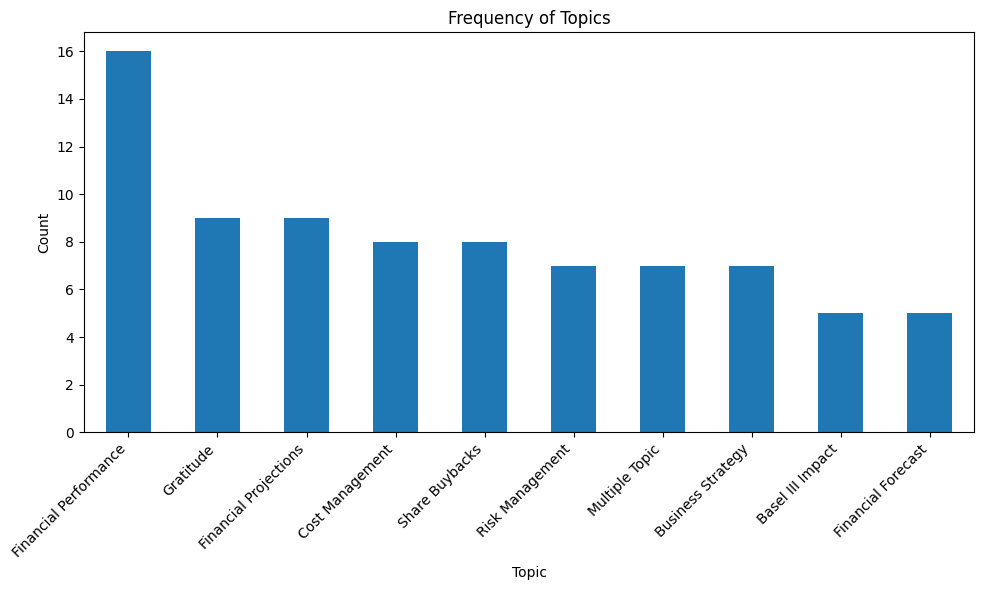

In [13]:
import matplotlib.pyplot as plt

# Count the frequency of each topic
topic_counts = final_df['Topic'].value_counts().head(10)

# Create a bar plot for the topics
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Frequency of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observations from the Plots

This plot shows the most frequently discussed topics across the dataset.
The top topics appear significantly more frequently than others, indicating that certain themes dominate analyst discussions.
There is a steep drop after the first few topics, it suggests that only a handful of topics drive the majority of the discussions.

Possible Insights:

If a risk-related topic (e.g., "Financial performance," "Financial projection") is the most frequent, it may indicate the bank's intention to create and manage goodwill.
A high occurrence of strategy-related topics (e.g., "Cost management," "Share buybacks") suggests a focus on business growth and capital allocation decisions.

<Figure size 1200x700 with 0 Axes>

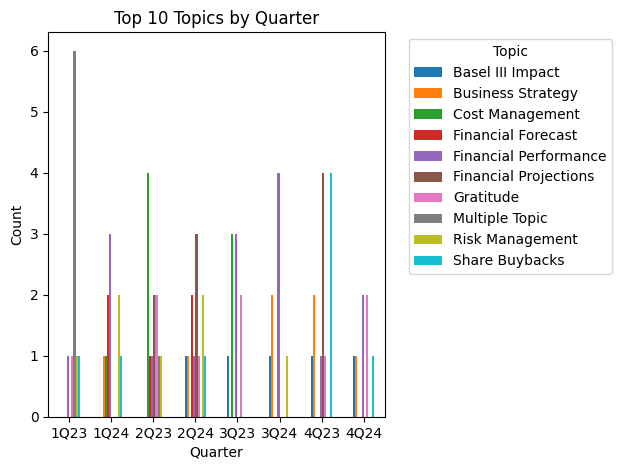

In [14]:
# Identify the top 10 topics overall
top_topics = final_df['Topic'].value_counts().head(10).index

# Filter the DataFrame for only these top topics
filtered_df = final_df[final_df['Topic'].isin(top_topics)]

# Group the data by Quarter and Topic, counting the occurrences
grouped_data = filtered_df.groupby(['Quarter', 'Topic']).size().unstack(fill_value=0)

# Plot the grouped bar chart
plt.figure(figsize=(12, 7))
grouped_data.plot(kind='bar')
plt.title('Top 10 Topics by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observation from the plot

This plot illustrates how the dominant discussion topics change over time.
Certain topics remain consistently high across multiple quarters, they represent persistent concerns or strategic focus areas for the banks.
A sharp increase in a topic's frequency in a particular quarter may indicate:
A significant event (e.g., regulatory changes, macroeconomic shifts, major bank announcements).
Analysts' concerns about a specific issue during that time period.
If risk-related topics spike in a specific quarter, it may correspond to market volatility, financial crises, or regulatory changes.
If the mix of topics varies each quarter, it suggests shifting priorities and discussions based on evolving economic conditions.
Possible Insights:

Topics like "Business Strategy" or "Cost management" dominate a particular quarter, it may align with external financial stress (e.g., market downturns, banking crises).
The topics shift from risk-related in earlier quarters to growth-related (e.g., "Financial Strategy," "Share buybacks") in later quarters, it may indicate increasing confidence in the market.

# Section 3: Visualization of Trends & Insights:

<ipython-input-15-10f723d30e37>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bank_data['Analyst_Bank'], rotation=45, ha='right')
<ipython-input-15-10f723d30e37>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bank_data['Analyst_Bank'], rotation=45, ha='right')


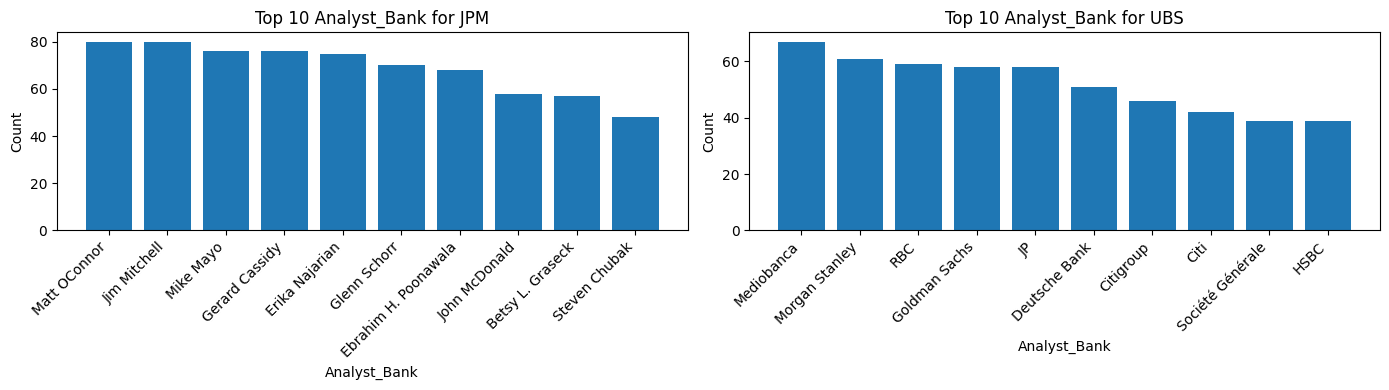

In [15]:
import math

# Create a working copy of the DataFrame
df = final_df.copy()


# Group by 'Bank' and the complete 'Analyst_Bank' value, and count the occurrences
grouped = df.groupby(['Bank', 'Analyst_Bank']).size().reset_index(name='Count')

# Get the unique banks for iterating over groups
banks = grouped['Bank'].unique()
num_banks = len(banks)

# Set up a grid of subplots (using 2 columns here)
ncols = 2
nrows = math.ceil(num_banks / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(14, nrows * 4), squeeze=False)

# For each bank, plot a bar chart of the top 10 Analyst_Bank entries by count
for i, bank in enumerate(banks):
    ax = axs[i // ncols, i % ncols]
    # Filter and sort the data for the current bank, selecting the top 10 entries
    bank_data = grouped[grouped['Bank'] == bank].sort_values(by='Count', ascending=False).head(10)
    ax.bar(bank_data['Analyst_Bank'], bank_data['Count'])
    ax.set_title(f"Top 10 Analyst_Bank for {bank}")
    ax.set_xlabel("Analyst_Bank")
    ax.set_ylabel("Count")
    ax.set_xticklabels(bank_data['Analyst_Bank'], rotation=45, ha='right')

# Remove any unused subplots in the grid
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j // ncols, j % ncols])

plt.tight_layout()
plt.show()

<ipython-input-16-0695b42969f1>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-16-0695b42969f1>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


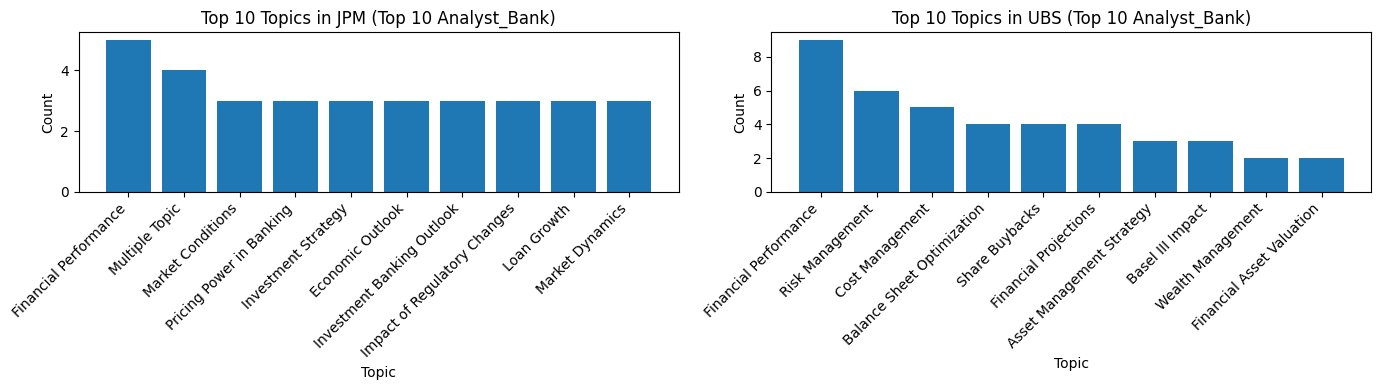

In [16]:
# Create a working copy of the DataFrame
df = final_df.copy()

# Get the unique banks from the data
banks = df['Bank'].unique()
num_banks = len(banks)

# Set up a grid of subplots (using 2 columns as an example)
ncols = 2
nrows = math.ceil(num_banks / ncols)
fig, axs = plt.subplots(nrows, ncols, figsize=(14, nrows * 4), squeeze=False)

# Iterate over each bank
for i, bank in enumerate(banks):
    ax = axs[i // ncols, i % ncols]

    # Filter the DataFrame for the current bank
    bank_df = df[df['Bank'] == bank]

    # Identify the top 10 Analyst_Bank entries for this bank
    top_ab = bank_df['Analyst_Bank'].value_counts().head(10).index

    # Filter data to only include rows from the top 10 Analyst_Bank
    filtered_bank_df = bank_df[bank_df['Analyst_Bank'].isin(top_ab)]

    # Group by Topic and count occurrences, then select the top 10 topics
    top_topics = filtered_bank_df['Topic'].value_counts().head(10)

    # Plot the results as a bar chart
    ax.bar(top_topics.index, top_topics.values)
    ax.set_title(f"Top 10 Topics in {bank} (Top 10 Analyst_Bank)")
    ax.set_xlabel("Topic")
    ax.set_ylabel("Count")
    ax.set_xticklabels(top_topics.index, rotation=45, ha='right')

# Remove any unused subplots if present
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j // ncols, j % ncols])

plt.tight_layout()
plt.show()

<ipython-input-17-905ad505a040>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-17-905ad505a040>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-17-905ad505a040>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


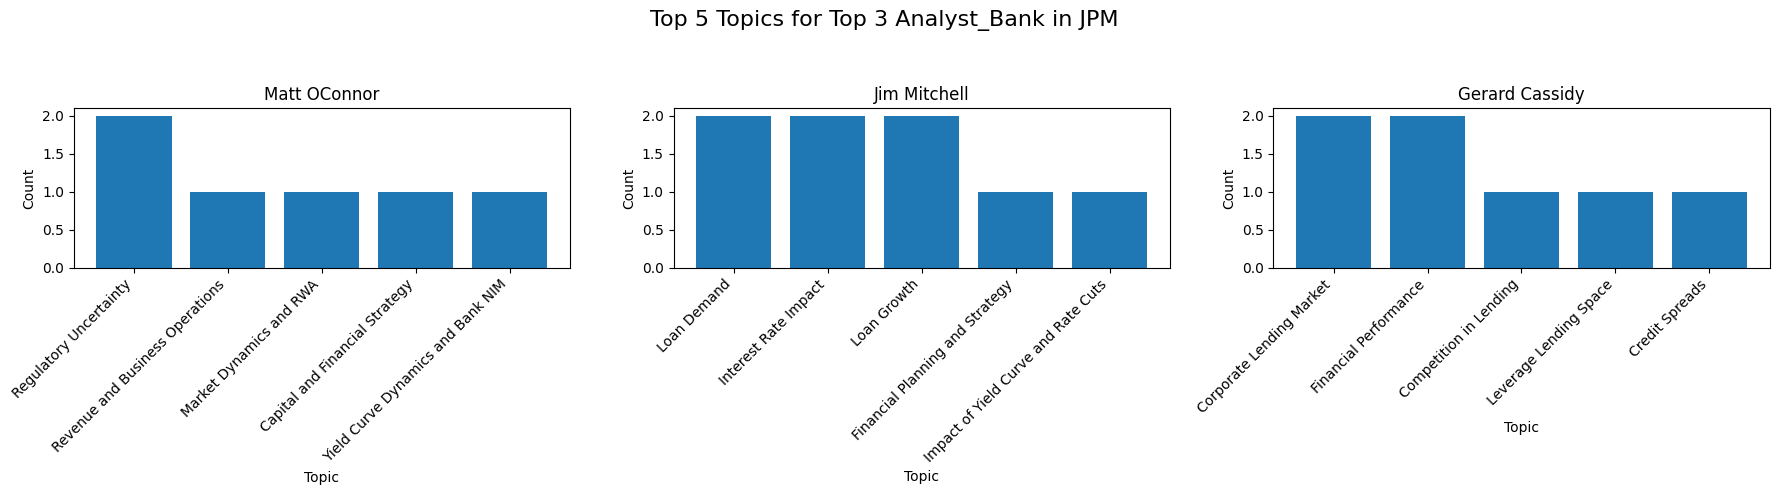

<ipython-input-17-905ad505a040>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-17-905ad505a040>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-17-905ad505a040>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


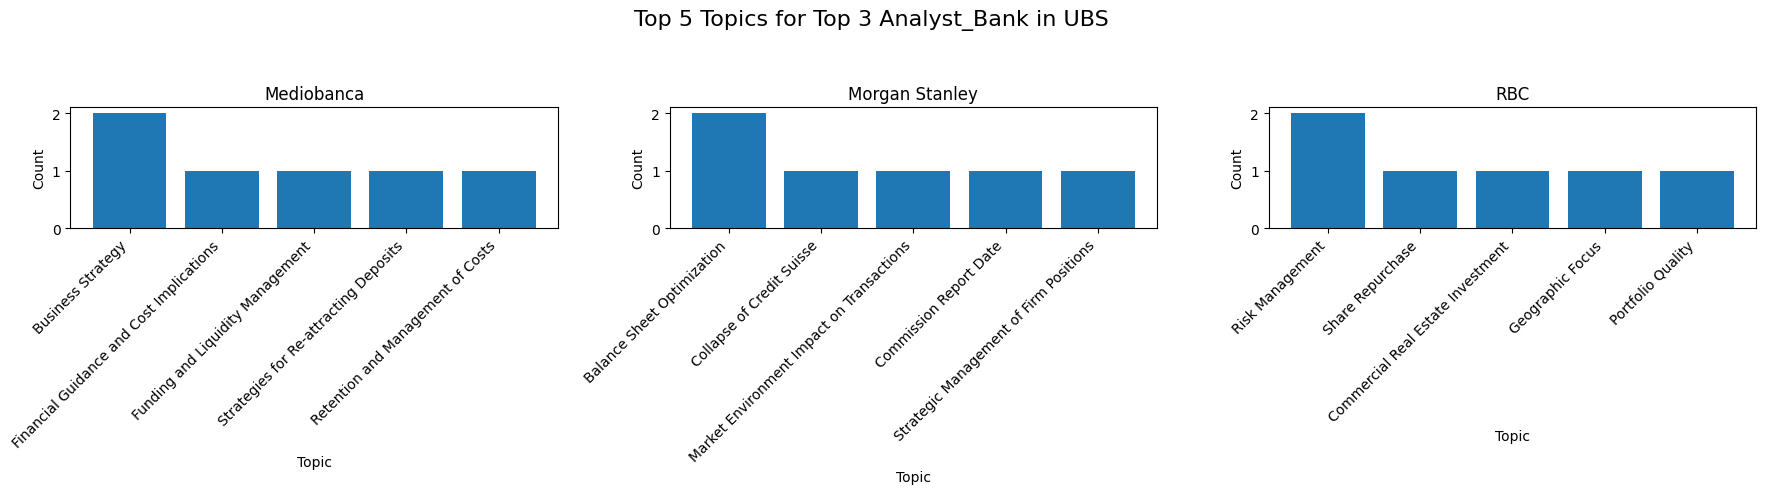

In [17]:
# Create a working copy of the DataFrame
df = final_df.copy()

# Get the unique banks
banks = df['Bank'].unique()

# Iterate over each bank
for bank in banks:
    # Filter DataFrame for the current bank
    bank_df = df[df['Bank'] == bank]

    # Calculate the top 3 Analyst_Bank entries for this bank
    top_analysts = bank_df['Analyst_Bank'].value_counts().head(3).index

    # Set up a figure with one subplot per top analyst
    fig, axs = plt.subplots(1, len(top_analysts), figsize=(6 * len(top_analysts), 5))

    # If only one subplot exists, put it in a list for consistency
    if len(top_analysts) == 1:
        axs = [axs]

    # For each top Analyst_Bank, plot the top 5 topics
    for ax, analyst in zip(axs, top_analysts):
        # Filter the bank DataFrame for the current Analyst_Bank
        analyst_df = bank_df[bank_df['Analyst_Bank'] == analyst]

        # Calculate the top 5 topics for this Analyst_Bank
        top_topics = analyst_df['Topic'].value_counts().head(5)

        # Create the bar chart for top topics
        ax.bar(top_topics.index, top_topics.values)
        ax.set_title(analyst)
        ax.set_xlabel("Topic")
        ax.set_ylabel("Count")
        ax.set_xticklabels(top_topics.index, rotation=45, ha='right')

    # Add a super title for the bank group and adjust layout
    fig.suptitle(f"Top 5 Topics for Top 3 Analyst_Bank in {bank}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

Observation form the above plots

**Top 5 Topics by Top 3 Analyst_Bank (JPM)**
This plot highlights the most discussed topics by the top 3 analysts covering JPMorgan.
The analysts are probing JP Morgan with market related topics such as 'Loan demand', 'Regulatory uncertainity' and 'Risk Management'. On a high level all these topics does not reveal good or strong confidence of analsysts on the bank.

Analyst Jim Mitchel and Gerard Cassidy showed strong focs on 2 themes. These Loan and regulatory concerns. It revelas that they want to emphaisze in these topics which may be concern for them for a long time.

**Top 5 Topics by Top 3 Analyst_Bank (UBS)**

This plot provides a similar breakdown but for UBS.

If UBS's top analysts focus on different topics than JPMorgan’s analysts, it suggests bank-specific concerns or strategies.

There is no topics overlap with JPMorgan’s, it might indicate that every bank is facing their own challenges and analysts are well aware of their challenges and questioning on lon term challenges.
A strong focus on business strategy and balance sheet optimization topics suggests UBS is being evaluated for its growth potential and capital efficiency.
Analysts discuss financial performance and credit score issues more than JPM analysts, it might indicate UBS’s greater exposure to global market risks.

Possible Insights:

UBS analysts discuss financial performance and busienss strategies, it suggests a focus on growth opportunities.
A high emphasis on compliance or risk may indicate regulatory pressures or internal restructuring.


<ipython-input-18-596f23dab7c1>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-18-596f23dab7c1>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


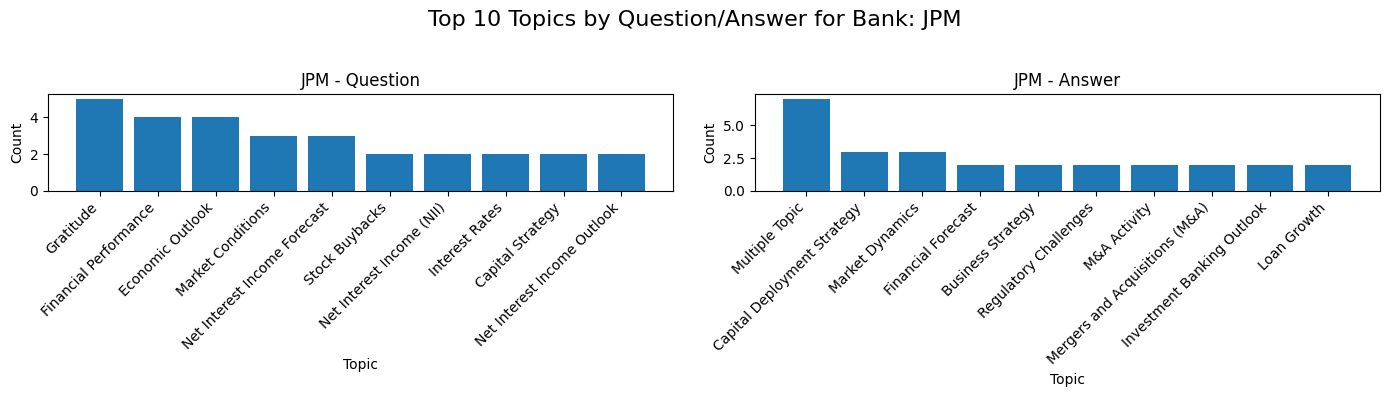

<ipython-input-18-596f23dab7c1>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-18-596f23dab7c1>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


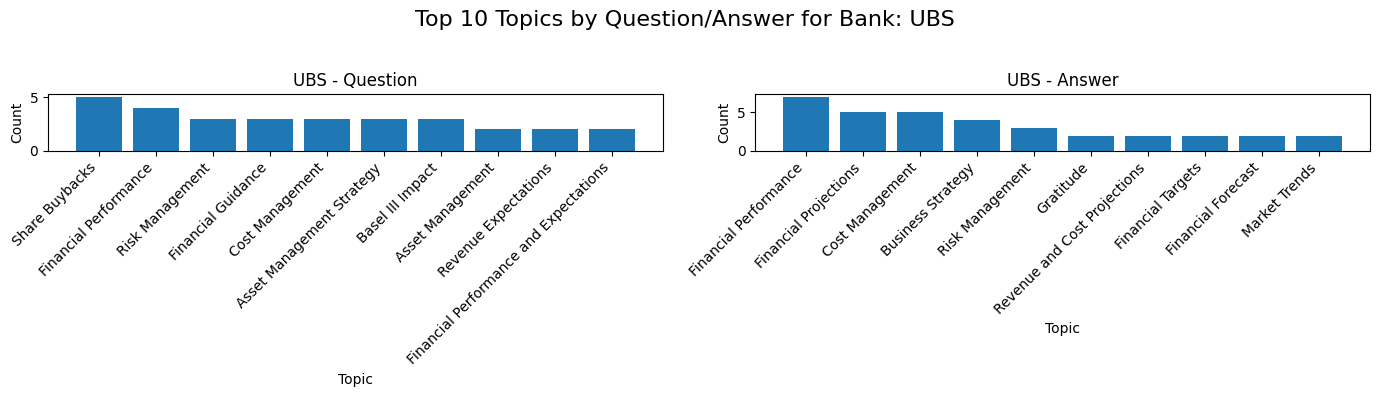

In [18]:
# Create a working copy of the DataFrame
df = final_df.copy()


# Get the unique banks
banks = df['Bank'].unique()

# Iterate over each bank
for bank in banks:
    bank_df = df[df['Bank'] == bank]

    # Get unique Question/Answer groups for the current bank.
    # Ensure the 'Question/Answer' column exists in your DataFrame.
    qa_groups = bank_df['Question/Answer'].unique()

    # Setup subplots for each Question/Answer group in the current bank.
    ncols = 2  # adjust number of columns as desired
    nrows = math.ceil(len(qa_groups) / ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=(14, nrows * 4), squeeze=False)

    # Iterate over each Question/Answer group and plot top 10 topics
    for i, qa in enumerate(qa_groups):
        ax = axs[i // ncols, i % ncols]
        qa_df = bank_df[bank_df['Question/Answer'] == qa]
        top_topics = qa_df['Topic'].value_counts().head(10)

        ax.bar(top_topics.index, top_topics.values)
        ax.set_title(f"{bank} - {qa}")
        ax.set_xlabel("Topic")
        ax.set_ylabel("Count")
        ax.set_xticklabels(top_topics.index, rotation=45, ha='right')

    # Remove any unused subplots in the grid
    total_plots = nrows * ncols
    for j in range(len(qa_groups), total_plots):
        fig.delaxes(axs[j // ncols, j % ncols])

    fig.suptitle(f"Top 10 Topics by Question/Answer for Bank: {bank}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

**JPM - Question Panel (Left Chart)**

The most frequently asked topic is "Gratitude", which might indicate formal expressions of appreciation before questions.
Analysts focused on economic and financial performance, with topics like:
"Economic Outlook" – indicating concerns about macroeconomic conditions.
"Financial Performance" & "Market Conditions" – suggesting a focus on JPMorgan’s business performance and market environment.
"Net Interest Income Forecast" – implying analysts are keen on understanding JPMorgan’s future earnings from lending activities.
Regulatory and strategic concerns are also present, including:
"CET1 Ratio" – a key regulatory capital requirement.
"Impact of Regulatory Changes" – indicating potential concerns about compliance and evolving financial regulations.
"Pricing Power in Banking" – suggesting interest in how JPMorgan manages interest rates and pricing strategies.

**JPM - Answer Panel (Right Chart)**

The most discussed topic in responses is "Multiple Topic", implying that many responses cover multiple issues rather than single concerns.
Strategic and financial matters dominate JPMorgan’s responses, including:
"Market Dynamics" – discussing JPMorgan’s position in changing economic conditions.
"Capital Deployment Strategy" – indicating how JPMorgan is allocating its financial resources.
"Loan Growth" – reflecting the bank’s stance on lending expansion.
"Mergers and Acquisitions (M&A)" – hinting at JPMorgan’s involvement or interest in industry consolidations.
"Investment Banking Outlook" – likely covering JPMorgan’s growth plans in investment banking.
Regulatory discussions remain relevant, with:
"Regulatory Challenges" being a key topic.
Business and financial strategies are also prominent, such as:
"Business Strategy" and "Financial Forecast", showing JPMorgan’s emphasis on future planning.

**UBS - Question Panel (Left Chart)**

The most frequently asked topic is "Share Buybacks", indicating that analysts are particularly interested in UBS’s capital return strategy.
Analysts also focus on UBS’s financial health and efficiency, with topics such as:
"Financial Performance" – suggesting an emphasis on UBS’s earnings and revenue growth.
"Cost Management" – indicating concerns about UBS’s expense control and profitability.
"Risk Management" & "Basel III Impact" – pointing to concerns about regulatory capital requirements and UBS’s risk exposure.
"Asset Management Strategy" – showing interest in UBS’s investment and portfolio management strategies.
Discussions around "Balance Sheet Optimization" and "Regulatory Approvals" suggest a focus on UBS’s capital structure and compliance.
"Client Retention Strategy" appearing in the top 10 suggests that analysts are interested in UBS’s ability to retain and grow its customer base.

**UBS - Answer Panel (Right Chart)**

UBS’s responses focus heavily on financial discipline and business strategy, with the most frequent topics being:
"Financial Performance" – aligning with analysts' concerns.
"Cost Management" – a key topic in both questions and answers, indicating UBS’s active focus on efficiency.
"Financial Projections" – showing UBS’s intent to provide forward-looking guidance.
"Business Strategy" – suggesting UBS frames many of its responses in a broader strategic context.
Risk management remains a key topic, implying UBS acknowledges regulatory concerns but does not overemphasize them.
Other key discussion points:
"Merger Impact" – indicating discussions around acquisitions or business integrations.
"Cost Management and Savings" – reinforcing UBS’s emphasis on efficiency.
"Market Trends" – indicating responses tailored to broader economic and financial conditions.

<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


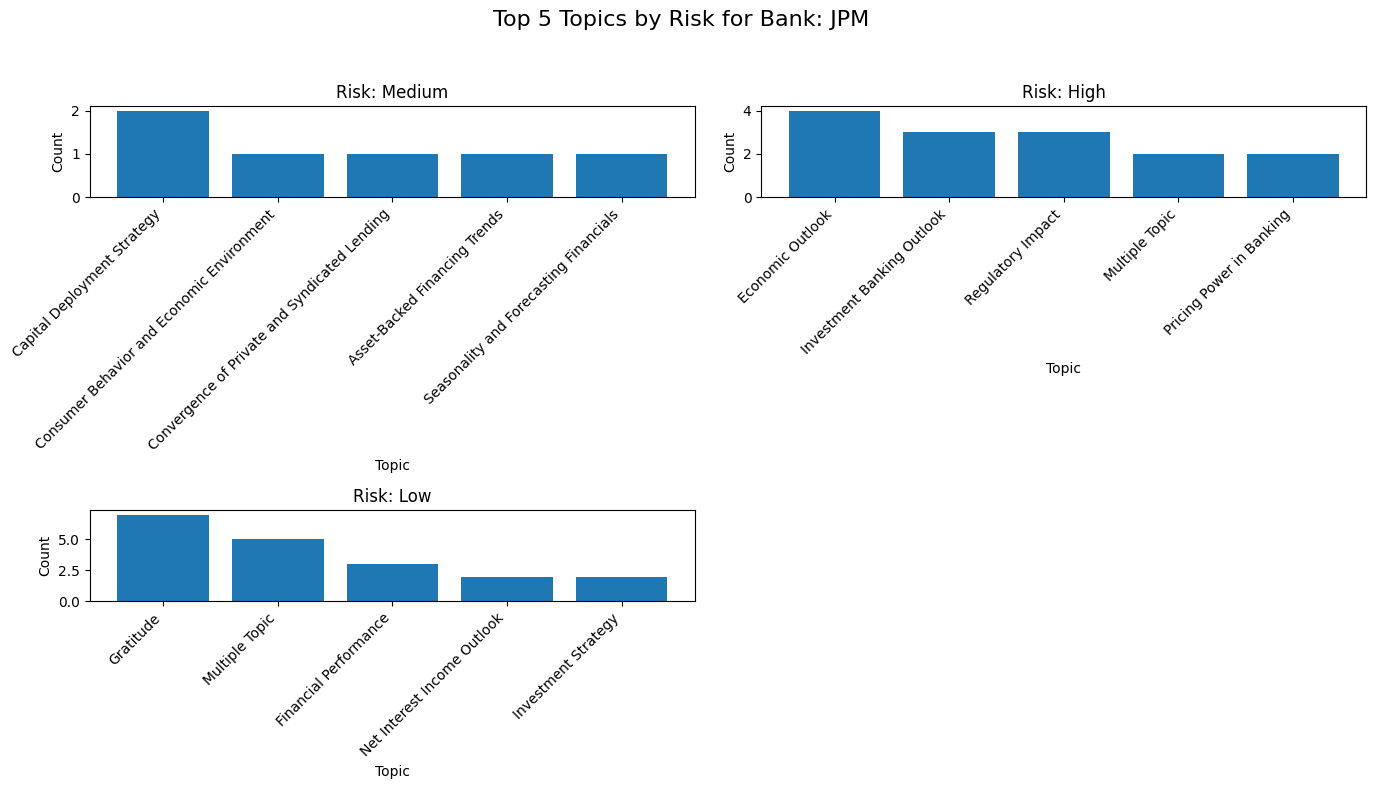

<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')
<ipython-input-19-9855516b05b1>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_topics.index, rotation=45, ha='right')


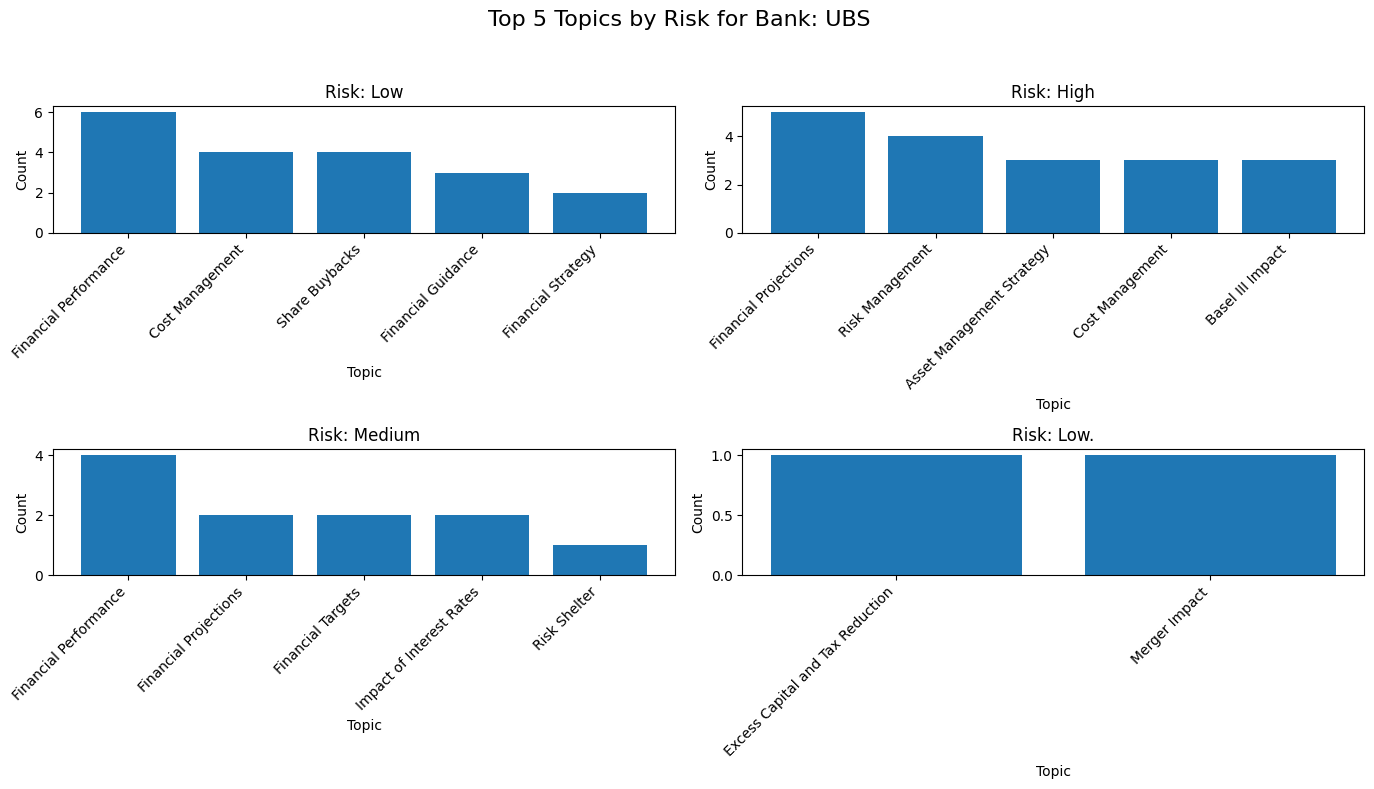

In [19]:
# Get all unique banks from the DataFrame
banks = final_df['Bank'].unique()

# Iterate over each bank
for bank in banks:
    bank_df = final_df[final_df['Bank'] == bank]
    risk_values = bank_df['Risk'].unique()

    # Set up subplots for each risk group for the current bank.
    ncols = 2  # adjust number of columns as needed
    nrows = math.ceil(len(risk_values) / ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=(14, nrows * 4), squeeze=False)

    # Iterate over each risk level within the bank group
    for i, risk in enumerate(risk_values):
        ax = axs[i // ncols, i % ncols]
        risk_df = bank_df[bank_df['Risk'] == risk]
        top_topics = risk_df['Topic'].value_counts().head(5)

        # Create a bar chart of the top 5 topics for this risk category
        ax.bar(top_topics.index, top_topics.values)
        ax.set_title(f"Risk: {risk}")
        ax.set_xlabel("Topic")
        ax.set_ylabel("Count")
        ax.set_xticklabels(top_topics.index, rotation=45, ha='right')

    # Remove any extra subplots if present
    total_plots = nrows * ncols
    for j in range(i + 1, total_plots):
        fig.delaxes(axs[j // ncols, j % ncols])

    # Add an overall title for the current bank group and adjust layout
    fig.suptitle(f"Top 5 Topics by Risk for Bank: {bank}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

**Risk: High (Top-Right Chart)**

Most frequent topics:
Economic Outlook – Indicates that high-risk discussions are closely tied to macroeconomic conditions.
Regulatory Impact – Suggests that regulatory compliance and policy changes are major concerns in high-risk discussions.
Investment Banking Outlook – Reflects concerns about the performance and future trends in investment banking.
Financial Forecasting – Highlights the need to assess future earnings and financial risks.
Loan Loss Reserves – Points to concerns about potential credit losses and financial stability.
Possible Insights:
Discussions in the high-risk category tend to focus on macro-level financial health and regulatory uncertainties.
The presence of loan loss reserves and financial forecasting suggests an emphasis on credit risk and potential economic downturn scenarios.
Investment banking outlook appearing in high-risk discussions may indicate concerns about market volatility and deal-making risks.

**Risk: Medium (Top-Left Chart)**

Most frequent topics:
Capital Deployment Strategy – Indicates discussions about how financial resources are allocated in a moderate-risk setting.
Growth of Capital Base – Suggests that discussions involve balancing risk while expanding the bank’s financial strength.
Migration from Non-Interest-Bearing to Interest-Bearing Accounts – Reflects concerns about liquidity shifts and profitability management.
Asset-Backed Financing Trends – Highlights the focus on structured finance and leveraging assets for capital efficiency.
Seasonality and Forecasting Financials – Points to discussions around predictable market fluctuations and their impact on business strategies.
Possible Insights:
Medium-risk discussions focus more on capital strategy and structured financing rather than direct financial distress.
A shift in deposit types (migration to interest-bearing accounts) indicates profitability management under moderate risk conditions.
Seasonality appearing in this category suggests that financial trends and forecasting models are crucial in managing moderate risks.

**Risk: Low (Bottom Chart)**

Most frequent topics:
Gratitude – This suggests that low-risk discussions are more formal and less contentious, often involving acknowledgments.
Multiple Topic – Implies that low-risk discussions cover a broader range of issues without focusing heavily on a specific risk factor.
Financial Performance – Indicates that standard earnings and revenue discussions fall under the low-risk category.
Stock Buybacks – Suggests that capital return strategies (such as repurchasing shares) are seen as low-risk financial decisions.
Net Interest Income Outlook – Suggests that interest rate trends and income from lending are stable, with minimal perceived risk.
Possible Insights:
Low-risk topics tend to focus on financial performance and capital return, implying confidence in stability.
Stock buybacks appearing in the low-risk category reinforces the idea that shareholder returns are not considered a major financial risk.
The inclusion of "Multiple Topics" suggests that general discussions with no significant financial threat fall into this category.
Key Takeaways
High-risk discussions focus on economic conditions, regulatory challenges, and financial forecasting, indicating concerns about external market risks.
Medium-risk topics center around capital deployment, liquidity shifts, and financing trends, suggesting more strategic financial planning.
Low-risk discussions involve general financial performance, stock buybacks, and net interest income, reflecting a stable, less concerning financial outlook.
Loan loss reserves and investment banking in the high-risk category suggest potential volatility in credit and market-driven revenues.
The presence of capital growth and deployment in medium-risk discussions highlights strategic decisions that require balanced risk management.

    Bank Quarter     Macro Topic  Count
0    JPM    1Q23  Total exposure     27
10   JPM    1Q24  Total exposure     41
21   JPM    2Q23  Total exposure     49
33   JPM    2Q24  Total exposure     37
43   JPM    3Q23  Total exposure     47
53   JPM    3Q24  Total exposure     26
63   JPM    4Q23  Total exposure     29
75   JPM    4Q24  Total exposure     34
85   UBS    1Q23  Total exposure     64
94   UBS    1Q24  Total exposure     63
105  UBS    2Q23  Total exposure     72
112  UBS    2Q24  Total exposure     56
120  UBS    3Q23  Total exposure     42
130  UBS    3Q24  Total exposure     55
139  UBS    4Q23  Total exposure     90
150  UBS    4Q24  Total exposure     61


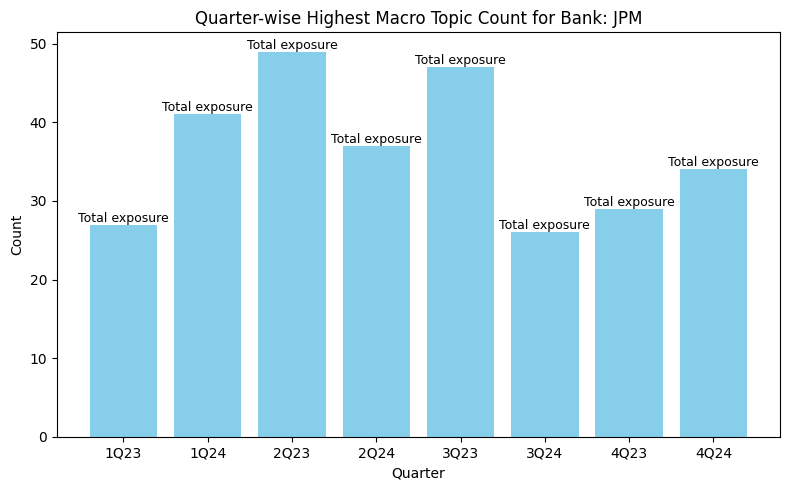

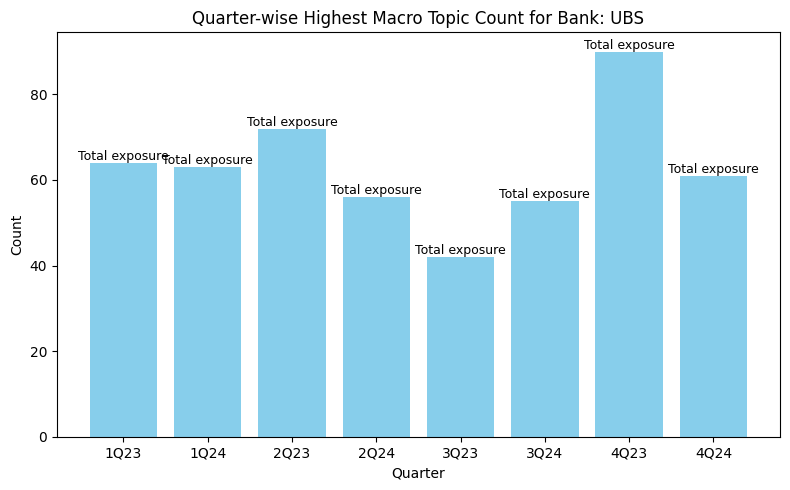

In [20]:
# Group by Bank and Quarter, and count occurrences of each 'Macro Topic'
grouped = final_df.groupby(['Bank', 'Quarter'])['Macro Topic'].value_counts().reset_index(name='Count')

# For each Bank and Quarter, select the row with the highest count (i.e., the top Macro Topic)
top_macro_topic = grouped.loc[grouped.groupby(['Bank', 'Quarter'])['Count'].idxmax()]

# Display the results
print(top_macro_topic)

# Optionally, plot the highest Macro Topic count per Quarter for each Bank
banks = top_macro_topic['Bank'].unique()
for bank in banks:
    bank_data = top_macro_topic[top_macro_topic['Bank'] == bank].sort_values('Quarter')

    plt.figure(figsize=(8, 5))
    plt.bar(bank_data['Quarter'].astype(str), bank_data['Count'], color='skyblue')

    # Annotate the bars with the Macro Topic label
    for _, row in bank_data.iterrows():
        plt.text(str(row['Quarter']), row['Count'], row['Macro Topic'],
                 ha='center', va='bottom', fontsize=9)

    plt.title(f"Quarter-wise Highest Macro Topic Count for Bank: {bank}")
    plt.xlabel("Quarter")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Based on G-SIB assesment criteria, the 'Total Exposure' which has 20% weightage in the evaluation is dominantly present in all the years

    Bank Quarter High Level Topic  Count
0    JPM    1Q23           Equity     17
7    JPM    1Q24           Equity     54
18   JPM    2Q23           Equity     30
28   JPM    2Q24           Equity     39
38   JPM    3Q23           Equity     35
49   JPM    3Q24           Equity     31
61   JPM    4Q23           Equity     29
73   JPM    4Q24           Equity     33
83   UBS    1Q23           Equity     42
93   UBS    1Q24           Equity     40
104  UBS    2Q23           Equity     32
114  UBS    2Q24           Equity     22
124  UBS    3Q23           Equity     16
133  UBS    3Q24           Equity     36
143  UBS    4Q23           Equity     63
153  UBS    4Q24           Equity     33


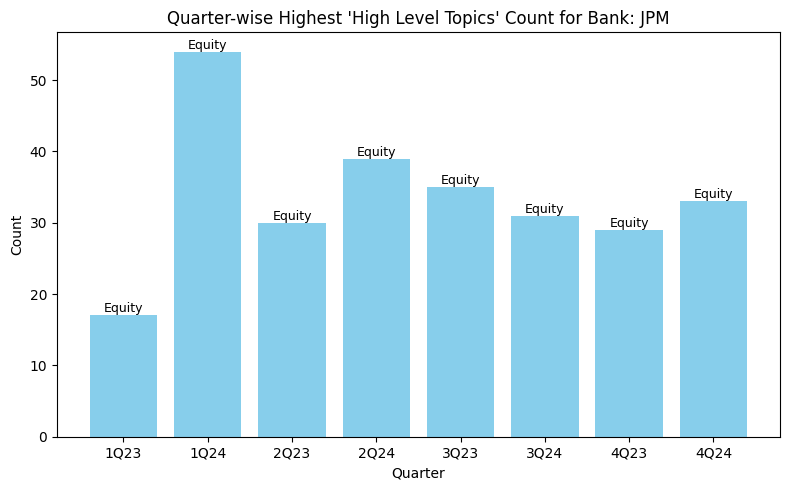

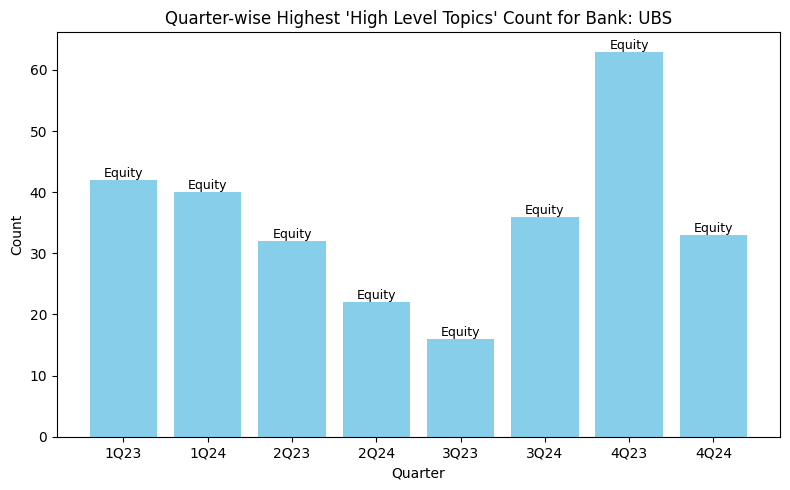

In [21]:
# Group by Bank and Quarter, then count occurrences of each 'High Level Topics'
grouped = final_df.groupby(['Bank', 'Quarter'])['High Level Topic']\
                  .value_counts().reset_index(name='Count')

# For each Bank and Quarter, select the row with the highest count
top_high_level = grouped.loc[grouped.groupby(['Bank', 'Quarter'])['Count'].idxmax()]

# Print the resulting DataFrame
print(top_high_level)

# Optionally, plot the highest count High Level Topics for each bank per quarter
banks = top_high_level['Bank'].unique()
for bank in banks:
    bank_data = top_high_level[top_high_level['Bank'] == bank].sort_values('Quarter')

    plt.figure(figsize=(8, 5))
    plt.bar(bank_data['Quarter'].astype(str), bank_data['Count'], color='skyblue')

    # Annotate each bar with the corresponding High Level Topic label
    for _, row in bank_data.iterrows():
        plt.text(str(row['Quarter']), row['Count'], row['High Level Topic'],
                 ha='center', va='bottom', fontsize=9)

    plt.title(f"Quarter-wise Highest 'High Level Topics' Count for Bank: {bank}")
    plt.xlabel("Quarter")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Based on the high level topics, Both banks focus only on 'Equity' to keep goodwill and confidence of shareholders while presenting quarterly figures

# Section 4: Insights Extraction by interactive dashboard

In [22]:
# Create filter widgets with an "All" option for each
hl_topic_widget = widgets.Dropdown(
    options=['All'] + sorted(final_df['High Level Topic'].dropna().unique().tolist()),
    description="High Level Topic:"
)
macro_topic_widget = widgets.Dropdown(
    options=['All'] + sorted(final_df['Macro Topic'].dropna().unique().tolist()),
    description="Macro Topic:"
)
bank_widget = widgets.Dropdown(
    options=['All'] + sorted(final_df['Bank'].dropna().unique().tolist()),
    description="Bank:"
)
analyst_bank_widget = widgets.Dropdown(
    options=['All'] + sorted(final_df['Analyst_Bank'].dropna().unique().tolist()),
    description="Analyst_Bank:"
)
risk_widget = widgets.Dropdown(
    options=['All'] + sorted(final_df['Risk'].dropna().unique().tolist()),
    description="Risk:"
)

def update_plots(hl_topic, macro_topic, bank, analyst_bank, risk):
    # Start with the full DataFrame copy
    df = final_df.copy()

    # Apply filters if a specific value (not 'All') is chosen
    if hl_topic != 'All':
        df = df[df['High Level Topic'] == hl_topic]
    if macro_topic != 'All':
        df = df[df['Macro Topic'] == macro_topic]
    if bank != 'All':
        df = df[df['Bank'] == bank]
    if analyst_bank != 'All':
        df = df[df['Analyst_Bank'] == analyst_bank]
    if risk != 'All':
        df = df[df['Risk'] == risk]

    # Separate the DataFrame into 'Question' and 'Answer' subsets
    df_question = df[df['Question/Answer'] == 'Question']
    df_answer = df[df['Question/Answer'] == 'Answer']

    # Group by Quarter and count occurrences of 'Topic'
    question_counts = df_question.groupby('Quarter')['Topic'].count()
    answer_counts = df_answer.groupby('Quarter')['Topic'].count()

    # Clear previous output before plotting new results
    clear_output(wait=True)

    # Create two side-by-side bar plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].bar(question_counts.index.astype(str), question_counts.values, color='skyblue')
    axes[0].set_title("Questions by Quarter")
    axes[0].set_xlabel("Quarter")
    axes[0].set_ylabel("Count of Topics")

    axes[1].bar(answer_counts.index.astype(str), answer_counts.values, color='lightgreen')
    axes[1].set_title("Answers by Quarter")
    axes[1].set_xlabel("Quarter")
    axes[1].set_ylabel("Count of Topics")

    plt.tight_layout()
    plt.show()

# Create the interactive widget
interactive_plot = widgets.interactive(
    update_plots,
    hl_topic=hl_topic_widget,
    macro_topic=macro_topic_widget,
    bank=bank_widget,
    analyst_bank=analyst_bank_widget,
    risk=risk_widget
)

# Display the interactive controls and plot
display(interactive_plot)

interactive(children=(Dropdown(description='High Level Topic:', options=('All', 'Acquisition', 'Balance', 'Bal…

# **Key insights from interactive dashboard**

This interactive dashboard visualizes high-risk equity-related discussions between HSBC analysts and UBS executives across 3Q24 and 4Q24. The left chart shows that the number of questions remained stable across both quarters, indicating consistent analyst interest in high-risk equity topics. However, the right chart reveals that UBS provided more responses in 4Q24 compared to 3Q24, suggesting an increase in engagement or clarification on previously raised concerns. This trend may indicate that UBS executives became more responsive or that evolving market conditions necessitated more detailed explanations in the later quarter.